In [2]:
#Importing Libraries and loading data sets
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
store = pd.read_csv('roseman_store.csv')
df = pd.read_csv('roseman_train.csv')
test = pd.read_excel('roseman_test.xlsx')
sub = pd.read_excel('roseman_sample_submission.xlsx')

In [3]:
#Shape and preview
print('Train set shape:', df.shape)
print('Test set shape:', test.shape)

Train set shape: (1017209, 9)
Test set shape: (41088, 8)


In [4]:
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [5]:
#Train dataset
df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [6]:
test.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1.0,1.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
1,2.0,3.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
2,3.0,7.0,4.0,2015-09-17,1.0,1.0,0.0,0.0


In [7]:
#Extracting information by getting data descriptions
store.info()
#Visible Nan values for competitionDistance,CompetitionOpenSinceMonth...PromoInterval.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
df.info()
#There is no nan value in the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
test.info()
#1 nan value in the Open feature for the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  float64       
 1   Store          41088 non-null  float64       
 2   DayOfWeek      41088 non-null  float64       
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  float64       
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.5+ MB


In [10]:
#Looking into numerical missing values in store dataset in style
null = pd.DataFrame(store.isna().sum(), columns= ['Null Values'])
null['% Missing Values'] = (store.isna().sum()/len(df)*100)
null = null[null['% Missing Values']>0]
null.style.background_gradient(cmap = 'viridis', low = 0.2,high = 0.1)

,Null Values,% Missing Values
CompetitionDistance,3,0.000295
CompetitionOpenSinceMonth,354,0.034801
CompetitionOpenSinceYear,354,0.034801
Promo2SinceWeek,544,0.053480
Promo2SinceYear,544,0.053480
PromoInterval,544,0.053480


In [11]:
#Same thing for categorical data in store dataset
null_cat = null.select_dtypes(include = 'object')
null_cat.head(3)

""
CompetitionDistance
CompetitionOpenSinceMonth
CompetitionOpenSinceYear


In [12]:
store['PromoInterval'].unique()
#We see that promo interval is more of a categorical(object) datatype
#but the dataset did not include it as object datatype.

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [13]:
#filling in null values:
from sklearn.impute import SimpleImputer
# filling in null values for categorical  data
imp_mean_cat = SimpleImputer(strategy='most_frequent')
imp_mean_cat.fit(store[['CompetitionOpenSinceMonth', 
                        'CompetitionOpenSinceYear','PromoInterval']])
store[['CompetitionOpenSinceMonth', 
       'CompetitionOpenSinceYear','PromoInterval']] = imp_mean_cat.transform(store[['CompetitionOpenSinceMonth', 
                                                                                    'CompetitionOpenSinceYear','PromoInterval']])

In [14]:
#filling in null values for numeric data
imp_mean_num = SimpleImputer(strategy = 'median')
imp_mean_num.fit(store[['Promo2SinceWeek','Promo2SinceYear','CompetitionDistance']])
store[['Promo2SinceWeek','Promo2SinceYear',
       'CompetitionDistance']] = imp_mean_num.transform(store[['Promo2SinceWeek','Promo2SinceYear','CompetitionDistance']])

In [156]:
# filling in null values for categorical  data in the test dataset
imp_mean_cat = SimpleImputer(strategy='most_frequent')
imp_mean_cat.fit(test[['Open']])
test[['Open']] = imp_mean_cat.transform(test[['Open']])

In [15]:
store.info()
#Tada no more nan values present in the store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 87.2+ KB


In [16]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"
1113,1114,a,c,870.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct"


### Looking at the values that makes the categorical data for store dataset

In [17]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [18]:
store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [19]:
store['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

### Visualization of store Dataset

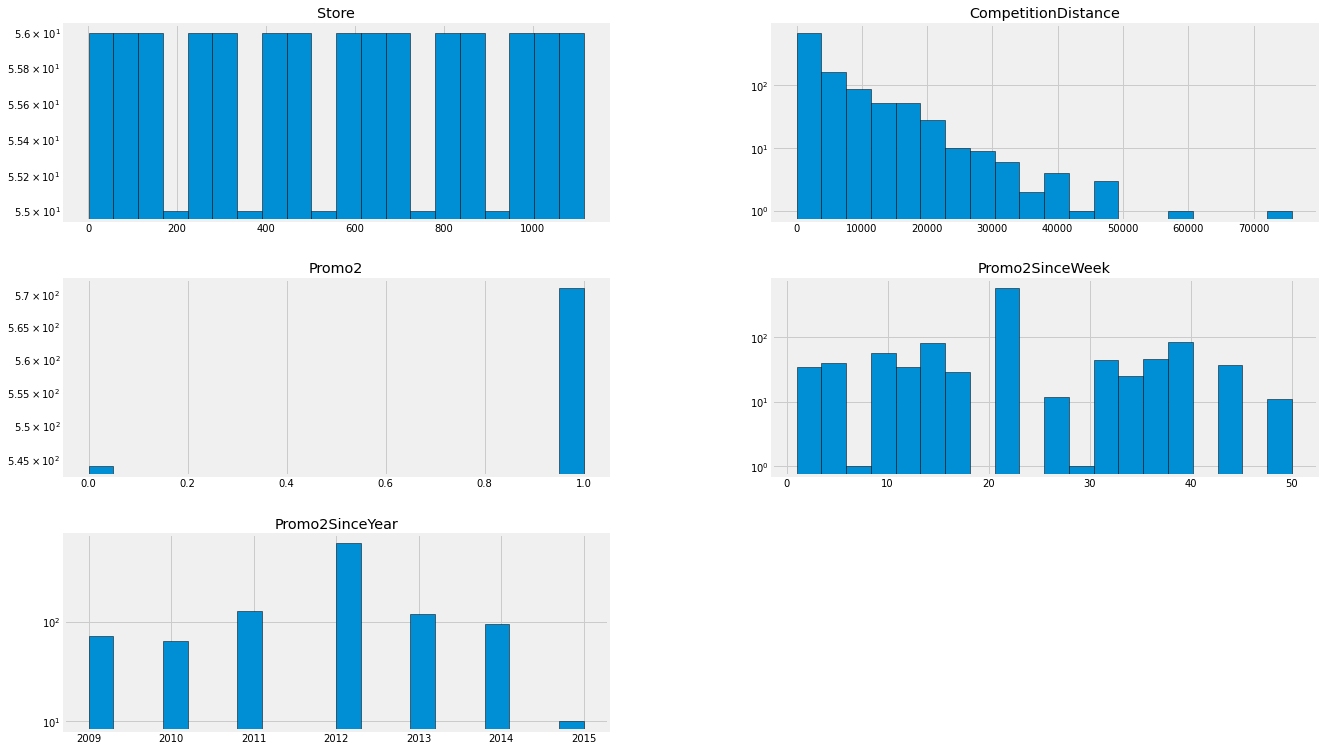

In [24]:
%matplotlib inline
store.hist(bins = 20, edgecolor = 'black', log = True, figsize = (20,13))
plt.show()
#full visualization of the store dataset

<AxesSubplot:xlabel='StoreType', ylabel='count'>

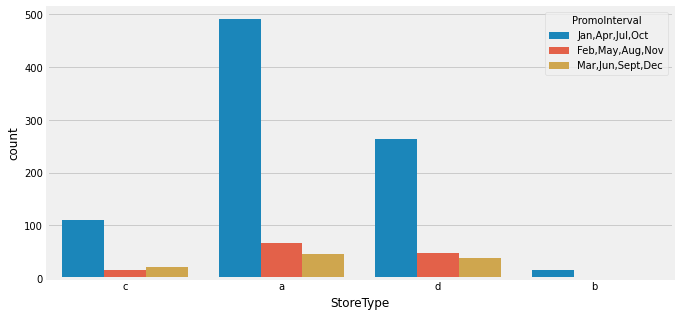

In [25]:
#Store Visualization:
#Checking Promotion Interval of each store types
plt.figure(figsize=(10,5))
sns.countplot(x = 'StoreType', hue = 'PromoInterval', data = store)

We can easily see that store 'a' has the most promo throughout the months and store 'b' has the least. 

<AxesSubplot:xlabel='StoreType', ylabel='count'>

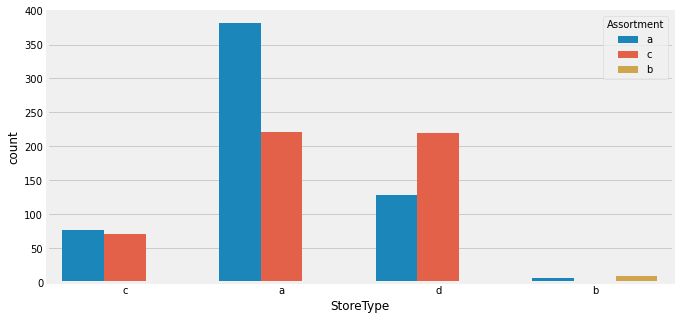

In [26]:
#Checking assortment of each store types
plt.figure(figsize=(10,5))
sns.countplot(x = 'StoreType', hue = 'Assortment', data = store)

Stores a,c,d has assortment of a and c while store b has an assortment of a and b.

<AxesSubplot:xlabel='StoreType', ylabel='CompetitionDistance'>

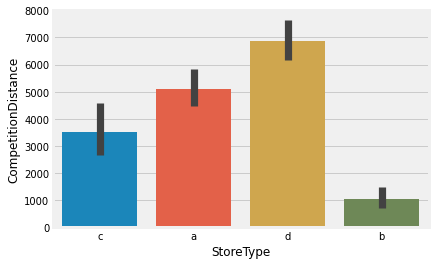

In [27]:
#Looking at the store competiton distance
sns.barplot(y='CompetitionDistance',x='StoreType',data = store)

In [28]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [29]:
#Getting statistical summary of train numeric data sets
describe_num = df.describe(include =['float64','int64','float','int'])
describe_num.T.style.background_gradient(cmap ='viridis', low = 0.2, high = 0.1)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.000000,558.429727,321.908651,1.000000,280.000000,558.000000,838.000000,1115.000000
DayOfWeek,1017209.000000,3.998341,1.997391,1.000000,2.000000,4.000000,6.000000,7.000000
Sales,1017209.000000,5773.818972,3849.926175,0.000000,3727.000000,5744.000000,7856.000000,41551.000000
Customers,1017209.000000,633.145946,464.411734,0.000000,405.000000,609.000000,837.000000,7388.000000
Open,1017209.000000,0.830107,0.375539,0.000000,1.000000,1.000000,1.000000,1.000000
Promo,1017209.000000,0.381515,0.485759,0.000000,0.000000,0.000000,1.000000,1.000000
SchoolHoliday,1017209.000000,0.178647,0.383056,0.000000,0.000000,0.000000,0.000000,1.000000


In [30]:
#Getting statistical summary of train categorical data sets
describe_cat = df.describe(include=['O'])
describe_cat.T.style.background_gradient(cmap ='viridis', low = 0.2, high =0.1)

,count,unique,top,freq
Date,1017209,942,2015-07-31,1115
StateHoliday,1017209,5,0,855087


### Feature Engineering

In [31]:
#making a deep copy to aviod making changes in our original dataset
df1 = df.copy()

In [32]:
#changing our Date feature in train dataset to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

In [33]:
#checking to confirm change to datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [34]:
#adding new features of year, month, week.
df1['Date_year'] = df1['Date'].dt.year
df1['Date_month'] = df1['Date'].dt.month
df1['Date_week'] = df1['Date'].dt.isocalendar().week

In [35]:
df1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [36]:
#making another deep copy.
df2 =  df1.copy()

In [37]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [38]:
#dealing with categorical data before training our model
df2.replace({'DayOfWeek': {7:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}, 
             'Date_month':{1:'January',2:'February',3:'March',4:'April',5:'May',
                           6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}}, inplace = True)

In [39]:
#checking the changes
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,Friday,2015-07-31,5263,555,1,1,0,1,2015,July,31
1,2,Friday,2015-07-31,6064,625,1,1,0,1,2015,July,31
2,3,Friday,2015-07-31,8314,821,1,1,0,1,2015,July,31
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,2015,July,31
4,5,Friday,2015-07-31,4822,559,1,1,0,1,2015,July,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017205,1112,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017206,1113,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1
1017207,1114,Tuesday,2013-01-01,0,0,0,0,a,1,2013,January,1


### Data visualization of the train dataset

<AxesSubplot:xlabel='Date_year', ylabel='Sales'>

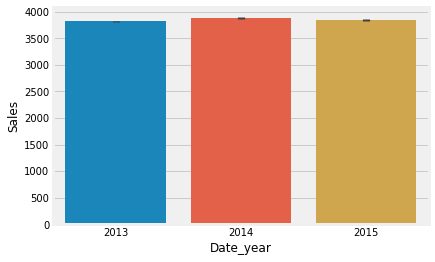

In [40]:
#Looking at the Date year to sales
sns.barplot(x='Date_year',y='Sales',data = df1,estimator = np.std)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

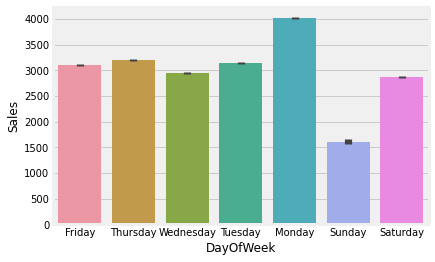

In [41]:
#Looking at the Sales for DAy of the week
sns.barplot(x='DayOfWeek',y='Sales',data = df2,estimator = np.std)

Sunday has the least sell and Monday has the most which makes sense because sunday is a rest day and monday is like the first day of the working day.

<AxesSubplot:xlabel='Sales', ylabel='Date_month'>

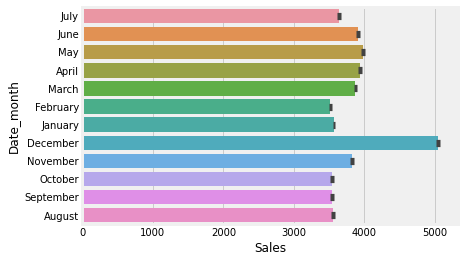

In [42]:
#Looking at the sales for the months
sns.barplot(y='Date_month',x='Sales',data = df2,estimator = np.std)

We see here that the month of december has the most sales occurring while that of february has the least sales.

### Merging store and train data together

In [43]:
train = store.merge(df1,on=['Store'],how = 'left')

In [44]:
train

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_year,Date_month,Date_week
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-30,5020,546,1,1,0,1,2015,7,31
2,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-29,4782,523,1,1,0,1,2015,7,31
3,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-28,5011,560,1,1,0,1,2015,7,31
4,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",...,2015-07-27,6102,612,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-05,4771,339,1,0,0,1,2013,1,1
1017205,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-04,4540,326,1,0,0,1,2013,1,1
1017206,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-03,4297,300,1,0,0,1,2013,1,1
1017207,1115,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,2013-01-02,3697,305,1,0,0,1,2013,1,1


In [159]:
#doing the same for our test dataset
test1 = store.merge(test,on=['Store'],how = 'right')

In [160]:
test1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",1.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
1,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
2,7,a,c,24000.0,4.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",3.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
3,8,a,a,7520.0,10.0,2014.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",4.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
4,9,a,c,2030.0,8.0,2000.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",5.0,4.0,2015-09-17,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",41084.0,6.0,2015-08-01,1.0,0.0,0.0,0.0
41084,1112,c,c,1880.0,4.0,2006.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",41085.0,6.0,2015-08-01,1.0,0.0,0.0,0.0
41085,1113,a,c,9260.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",41086.0,6.0,2015-08-01,1.0,0.0,0.0,0.0
41086,1114,a,c,870.0,9.0,2013.0,0,22.0,2012.0,"Jan,Apr,Jul,Oct",41087.0,6.0,2015-08-01,1.0,0.0,0.0,0.0


In [161]:
#Checking for relevant attributes/features
corr_matrix = train.corr()

In [123]:
corr_matrix['Sales'].sort_values(ascending = False)

Sales                  1.000000
Customers              0.894711
Open                   0.678472
Promo                  0.452345
SchoolHoliday          0.085124
Date_week              0.052946
Date_month             0.048768
Promo2SinceWeek        0.032521
Date_year              0.023519
Store                  0.005126
Promo2SinceYear       -0.004027
CompetitionDistance   -0.018869
Promo2                -0.091040
DayOfWeek             -0.462125
Name: Sales, dtype: float64

<AxesSubplot:>

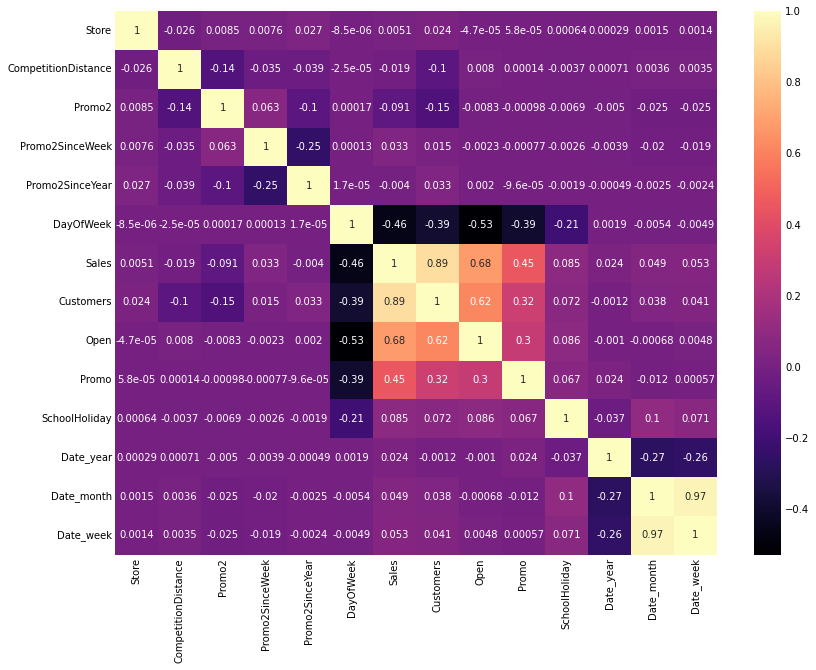

In [124]:
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), annot = True, cmap = 'magma')

From our heatmap we see that attributes like DayOfWeek,Promo2sinceyear and week,promo2,competitionDistance,competitionopensincemonth and year are not relevant so we drop them in out test and train dataset. Also we drop the datetime data too since there's is none in our test dataset

In [131]:
#dropping unimportant features
train_dataset =  train.drop(['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                             'Promo2','Promo2SinceWeek','Promo2SinceYear','Date','DayOfWeek','Date_year','Date_month','Date_week'], axis = 1)
train_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,"Jan,Apr,Jul,Oct",5263,555,1,1,0,1
1,1,c,a,"Jan,Apr,Jul,Oct",5020,546,1,1,0,1
2,1,c,a,"Jan,Apr,Jul,Oct",4782,523,1,1,0,1
3,1,c,a,"Jan,Apr,Jul,Oct",5011,560,1,1,0,1
4,1,c,a,"Jan,Apr,Jul,Oct",6102,612,1,1,0,1


In [162]:
#doing same in the test dataset for uniformity
test_dataset =  test1.drop(['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                             'Promo2','Promo2SinceWeek','Promo2SinceYear','Date', 'DayOfWeek'], axis = 1)
test_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Id,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,"Jan,Apr,Jul,Oct",1.0,1.0,1.0,0.0,0.0
1,3,a,a,"Jan,Apr,Jul,Oct",2.0,1.0,1.0,0.0,0.0
2,7,a,c,"Jan,Apr,Jul,Oct",3.0,1.0,1.0,0.0,0.0
3,8,a,a,"Jan,Apr,Jul,Oct",4.0,1.0,1.0,0.0,0.0
4,9,a,c,"Jan,Apr,Jul,Oct",5.0,1.0,1.0,0.0,0.0


### More relevant Data visualization

<AxesSubplot:xlabel='Sales', ylabel='StoreType'>

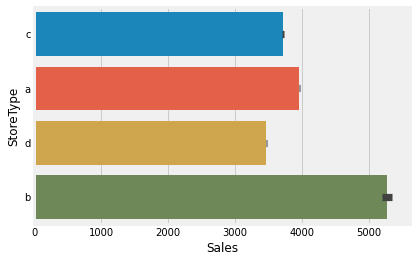

In [52]:
#How storetype is related to sales
sns.barplot(y ='StoreType', x='Sales', data = train_dataset, estimator = np.std)
#we see store b has a lot of sales.

<AxesSubplot:xlabel='Sales', ylabel='Assortment'>

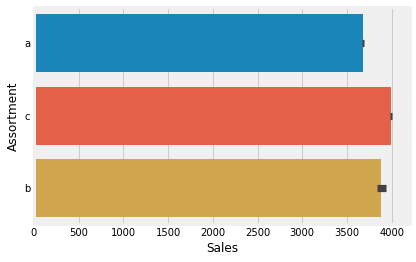

In [53]:
#How sales is related to assortment
sns.barplot(y ='Assortment', x='Sales', data = train_dataset, estimator = np.std)
#assortment c is the most sold product in terms of sales

## Model Building

In [132]:
train_dataset.head(2)

,Store,StoreType,Assortment,PromoInterval,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,"Jan,Apr,Jul,Oct",5263,555,1,1,0,1
1,1,c,a,"Jan,Apr,Jul,Oct",5020,546,1,1,0,1


In [134]:
#Converting categorical data to numeric by encoding
train_dataset['StoreType'] = train_dataset['StoreType'].astype('category')
train_dataset['Assortment'] = train_dataset['Assortment'].astype('category')
train_dataset['PromoInterval'] = train_dataset['PromoInterval'].astype('category')
train_dataset['StateHoliday'] = train_dataset['StateHoliday'].astype('category')


train_dataset['StoreType'] = train_dataset['StoreType'].cat.codes
train_dataset['Assortment'] = train_dataset['Assortment'].cat.codes
train_dataset['PromoInterval'] = train_dataset['PromoInterval'].cat.codes
train_dataset['StateHoliday'] = train_dataset['StateHoliday'].cat.codes

In [135]:
train_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,0,1,5263,555,1,1,1,1
1,1,2,0,1,5020,546,1,1,1,1
2,1,2,0,1,4782,523,1,1,1,1
3,1,2,0,1,5011,560,1,1,1,1
4,1,2,0,1,6102,612,1,1,1,1


In [136]:
train_dataset['StateHoliday'].unique()

array([1, 2, 3, 4, 0], dtype=int8)

In [163]:
#Converting categorical data to numeric by encoding
test_dataset['StoreType'] = test_dataset['StoreType'].astype('category')
test_dataset['Assortment'] = test_dataset['Assortment'].astype('category')
test_dataset['PromoInterval'] = test_dataset['PromoInterval'].astype('category')
test_dataset['StateHoliday'] = test_dataset['StateHoliday'].astype('category')


test_dataset['StoreType'] = test_dataset['StoreType'].cat.codes
test_dataset['Assortment'] = test_dataset['Assortment'].cat.codes
test_dataset['PromoInterval'] = test_dataset['PromoInterval'].cat.codes
test_dataset['StateHoliday'] = test_dataset['StateHoliday'].cat.codes

In [164]:
test_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Id,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,0,1,1.0,1.0,1.0,0,0.0
1,3,0,0,1,2.0,1.0,1.0,0,0.0
2,7,0,2,1,3.0,1.0,1.0,0,0.0
3,8,0,0,1,4.0,1.0,1.0,0,0.0
4,9,0,2,1,5.0,1.0,1.0,0,0.0


In [137]:
#Splitting X and Y
features = train_dataset.columns[:-1]
X = train_dataset[features]
y = train_dataset['Sales']

In [138]:
#target feature
y

0          5263
1          5020
2          4782
3          5011
4          6102
           ... 
1017204    4771
1017205    4540
1017206    4297
1017207    3697
1017208       0
Name: Sales, Length: 1017209, dtype: int64

In [165]:
#probably not going to use it(X_test).
X_test = test_dataset

In [140]:
#dropping our target value(Sales feature) from the train dataset
x = train_dataset.drop(['Sales'], axis = 'columns')

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(x,y, test_size = 0.3, random_state=32)

In [142]:
print('y_val:',len(y_val))
print('x_val:',len(x_val))
print('y_train:',len(y_train))
print('x_train:',len(x_train))

y_val: 305163
x_val: 305163
y_train: 712046
x_train: 712046


In [143]:
#Testing a model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [144]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [145]:
lin_reg.score(x_val, y_val)
#the linear regression does well.

0.8631206500761212

In [146]:
#importing model libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [147]:
#using gridserchcv to search for the best model
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize': [True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cylic']
            }
        },
        'tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    for algo_name, rs in algos.items():
        gs = GridSearchCV(rs['model'], rs['params'],cv = 5, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns = ['model','best_score', 'best_params'])

In [148]:
find_best_model_using_gridsearchcv(x,y)
#We see that linear regression is the best of the 3 models

,model,best_score,best_params
0,linear_regression,0.861842,{'normalize': False}
1,lasso,0.861836,"{'alpha': 1, 'selection': 'random'}"
2,tree,0.804070,"{'criterion': 'mse', 'splitter': 'random'}"


In [149]:
lin_reg.score(x_val, y_val)

0.8631206500761212

In [173]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.25, random_state = 0)

In [176]:
#Model score for five splits
cross_val_score(LinearRegression(normalize = False), x,y, cv=cv)
#WE can see it performs well for 5 different shuffles so our model
#is not overfitting or underfitting the dataset

array([0.86236493, 0.86176373, 0.86235313, 0.86327181, 0.86317212])

In [166]:
#Using our model to predict for our test data sets
sales=lin_reg.predict(test_dataset)

In [167]:
#Adding the predicted sales to our test dataset
test_dataset['Sales'] = sales

In [168]:
test_dataset.head()

,Store,StoreType,Assortment,PromoInterval,Id,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,2,0,1,1.0,1.0,1.0,0,0.0,3010.155984
1,3,0,0,1,2.0,1.0,1.0,0,0.0,2556.058943
2,7,0,2,1,3.0,1.0,1.0,0,0.0,2954.882220
3,8,0,0,1,4.0,1.0,1.0,0,0.0,2567.808782
4,9,0,2,1,5.0,1.0,1.0,0,0.0,2967.041445


In [171]:
#Achieving Submission requirement
sub['Sales'] = sales.astype('int')

In [172]:
#Creating a CSV for our sample sumbmision dataset
sub.to_csv("submission.csv",index=False)
sub

,Id,Sales
0,1.0,3010
1,2.0,2556
2,3.0,2954
3,4.0,2567
4,5.0,2967
...,...,...
41083,41084.0,256463
41084,41085.0,257322
41085,41086.0,256868
41086,41087.0,256874


In [177]:
#The End
sub.shape

(41088, 2)